In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/micahevalt/Downloads/marketing_sales_data.csv')

In [3]:
df.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [4]:
df.describe()

,Radio,Social Media,Sales
count,571.000000,572.000000,571.000000
mean,18.646472,3.248471,193.516937
std,9.650740,2.195696,90.516153
min,0.194576,0.013230,31.199409
25%,10.878554,1.447163,118.544562
50%,18.810430,2.945318,198.521410
75%,25.838296,4.791290,268.567987
max,48.871161,11.260430,358.420739


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [53]:
df.nunique()

TV                3
Radio           571
Social Media    572
Influencer        4
Sales           571
dtype: int64

In [54]:
# let's investigate the non-numeric columns

In [50]:
df[['TV','Influencer']].value_counts().reset_index().sort_values(by=['TV','Influencer'])
# reminder: a bracket after a df can only have one argument, but that argument can be a list

,TV,Influencer,count
4,High,Macro,48
6,High,Mega,43
7,High,Micro,43
8,High,Nano,43
11,Low,Macro,39
0,Low,Mega,62
9,Low,Micro,43
2,Low,Nano,53
5,Medium,Macro,44
10,Medium,Mega,43


In [74]:
mask1 = (df['Sales'] > 0).reset_index()
mask1

,index,Sales
0,0,True
1,1,True
2,2,True
3,3,True
4,4,True
...,...,...
567,567,True
568,568,True
569,569,True
570,570,True


In [80]:
# there must be a better way to do this

mask2 = mask1['Sales'] == False
mask2

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Name: Sales, Length: 572, dtype: bool

In [81]:
df[mask2]

,TV,Radio,Social Media,Influencer,Sales
443,High,36.466753,5.635992,Mega,NaN


In [82]:
# could repeat this while plugging in Radio and TV into the mask, but you get the point

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            569 non-null    object 
 1   Radio         569 non-null    float64
 2   Social Media  569 non-null    float64
 3   Influencer    569 non-null    object 
 4   Sales         569 non-null    float64
dtypes: float64(3), object(2)
memory usage: 26.7+ KB


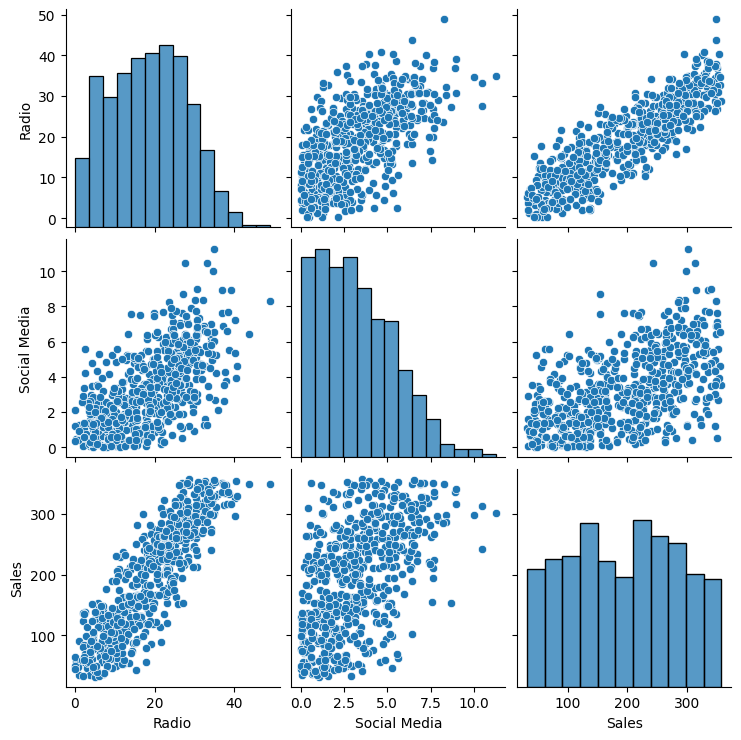

In [83]:
# looking at correlation b/t radio promotion budget and sales

sns.pairplot(df)

In [130]:
# there is a linear relationship between Radio and Sales. Good!
# we've establish linearity normality, independence, and homoscedasticity

In [85]:
df_sub = df[['Radio', 'Sales']]
df_sub.head(5)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328


In [86]:
ols_formula = "Sales ~ Radio"

In [95]:
from statsmodels.formula.api import ols
OLS = ols(formula = ols_formula, data = df_sub)
OLS

In [96]:
model = OLS.fit()

In [98]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          2.07e-176
Time:                        21:35:01   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# reminder: look at the 'coef' column for (1) intercept and (2) slope
# Sales = 41.53 + 8.17 * 'Radio'

In [109]:
# subset x-var ('Radio') and get predictions from model
x = df_sub['Radio']
predicted_values = model.predict(x)
predicted_values.head(5)

0     51.490549
1    163.721447
2    126.348847
3    257.873419
4    342.932984
dtype: float64

In [110]:
residuals = model.resid
residuals
# side note: the real Sales values from the df - the predicted values above = residuals below

0      38.563673
1      59.020221
2     -23.574057
3      70.365959
4       8.874344
         ...    
567    30.781101
568    -1.692607
569   -42.591308
570   -14.093977
571   -12.799642
Length: 569, dtype: float64

Text(0, 0.5, 'Residuals')

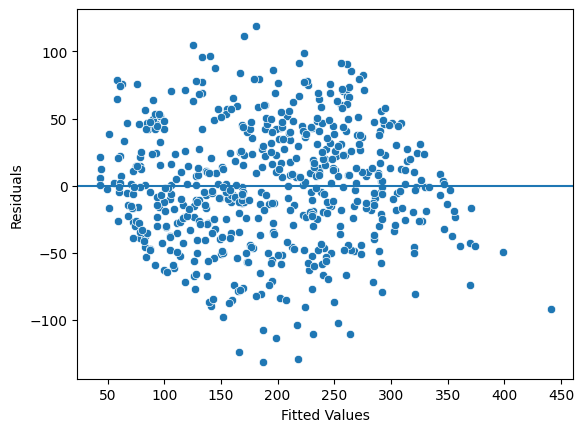

In [118]:
# predicted_values vs. residuals

fig = sns.scatterplot(x = predicted_values, y = residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

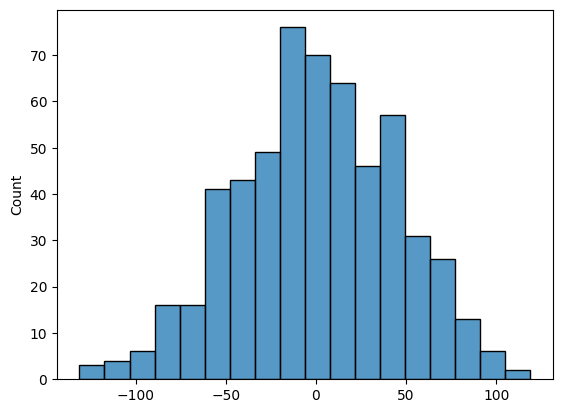

In [132]:
# residuals are greater near the middle and smaller on either side. 
# I might reject homoscedasticity, but lab examplar says it's good. 
# Let's check for normality with a histogram

fig = sns.histplot(residuals)

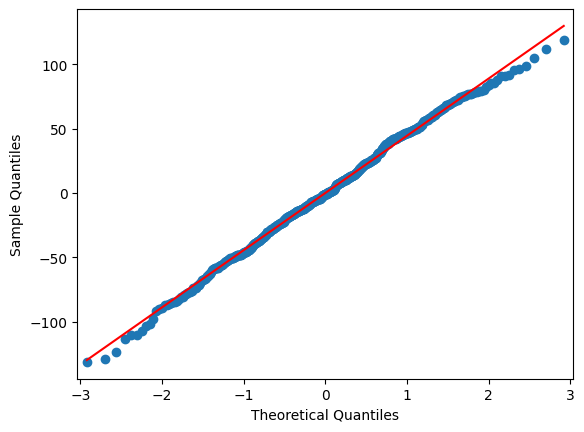

In [126]:
# nice, looks relatively normal but skewed. QQ plot will affirm our normality assumptions
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')

In [127]:
# ever so slightly curved on the ends, but we can call our model very reasonable!

<Axes: xlabel='Radio', ylabel='Sales'>

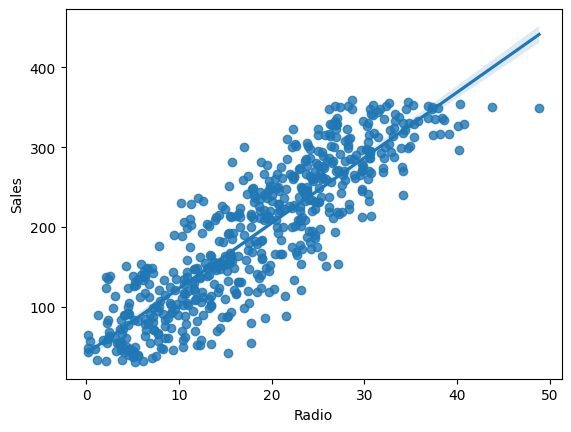

In [131]:
# what a good boy

sns.regplot(x = 'Radio', y = 'Sales', data = df_sub)